In [1]:
from modules.analysis import testing_analyzer
from modules.data_generator import data_generator
from modules.visualization import visualization_module

analyzer = testing_analyzer()

data_sets = data_generator()

visualizer = visualization_module()

A university professor gave online lectures instead of face-to-face classes due to Covid-19. Later, he uploaded recorded lectures to the cloud for students who followed the course asynchronously (those who did not attend the lesson but later watched the records). However, he believes that the students who attend class at the class time and participate in the process are more successful. Therefore, he recorded the average grades of the students at the end of the semester. The data is below.

Conduct the hypothesis testing to check whether the professor’s belief is statistically significant by using a 0.05 significance level to evaluate the null and alternative hypotheses. Before doing hypothesis testing, check the related assumptions. Comment on the results.


synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]      
asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]

First example consist in data previously setted (sample size is 22, less than necessary for t-test, but great for a quick example), but after this a new dataset will be simulated and some of parameters will change in order to try differents kinds of distributions and simulations.

# 1. Defining the hypothesis

Since the grades are obtained from the different individuals, the data is unpaired.

**H₀:** μₛ≤μₐ  
**H₁**: μₛ>μₐ

# 2. Assumption Check

**H₀:**  The data is normally distributed.  
**H₁:**  The data is not normally distributed.  
Assume that α=0.05. If the  _p_-value is >0.05, it can be said that data is normally distributed.

For checking normality, Shapiro-Wilk’s W test was used, which is generally preferred for smaller samples, however there are other options like Kolmogorov-Smirnov and D'Agostino and Pearson's test. More info [here](https://docs.scipy.org/doc/scipy/reference/stats.html) 

In [2]:
data_sets.fixed_data['Q1_t-test_independent']['sync']

array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
       87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])

In [3]:
data_sets.fixed_data['Q1_t-test_independent']['asyncr']

array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7,
       72.6, 71.5, 78.2])

In [4]:
analyzer.check_normality(data_sets.fixed_data['Q1_t-test_independent']['sync'])

p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed


In [5]:
analyzer.check_normality(data_sets.fixed_data['Q1_t-test_independent']['asyncr'])

p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed


In [6]:
sync = data_sets.fixed_data['Q1_t-test_independent']['sync']
asyncr = data_sets.fixed_data['Q1_t-test_independent']['asyncr']

analyzer.check_variance_homogeneity(sync, asyncr)

p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.


In [7]:
analyzer.run_t_test_independent(sync, asyncr)

p value:0.00753598
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


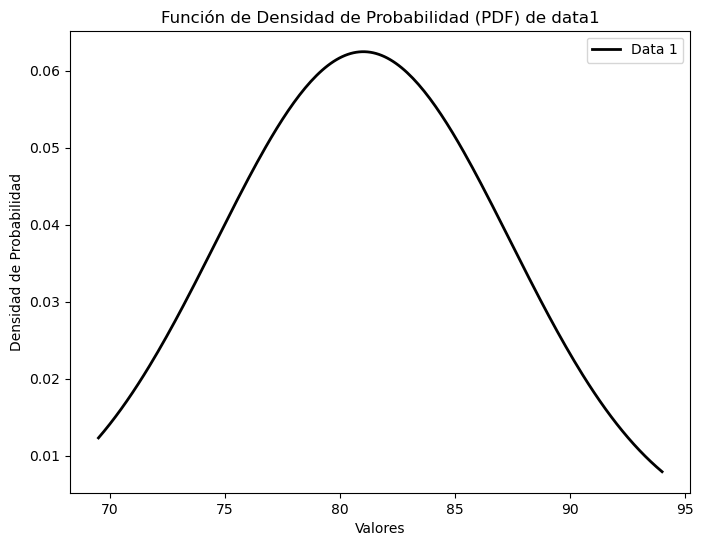

In [9]:
visualizer.plot_normal_distribution(sync)

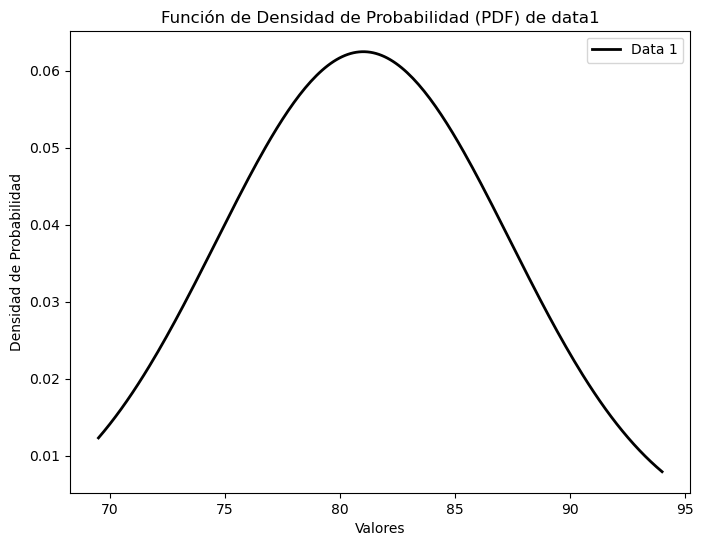

In [10]:
visualizer.plot_normal_distribution(asyncr)